In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv("D:/2nd-sem/data-science_workflow/airbnb_price_prediction/data/uncleaned_data/listings.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14187 non-null  int64  
 1   listing_url                                   14187 non-null  object 
 2   scrape_id                                     14187 non-null  int64  
 3   last_scraped                                  14187 non-null  object 
 4   source                                        14187 non-null  object 
 5   name                                          14187 non-null  object 
 6   description                                   13584 non-null  object 
 7   neighborhood_overview                         6540 non-null   object 
 8   picture_url                                   14187 non-null  object 
 9   host_id                                       14187 non-null 

In [9]:
cols_to_keep = [
    'price', 'accommodates', 'bedrooms', 'bathrooms_text',
    'room_type', 'property_type', 'minimum_nights',
    'availability_365', 'number_of_reviews',
    'review_scores_rating',
    'latitude', 'longitude',
    'neighbourhood_cleansed'
]

df_filtered = df[cols_to_keep].copy()

In [11]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed
0,$105.00,2,1.0,1 bath,Entire home/apt,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest
1,$135.00,7,4.0,2.5 baths,Entire home/apt,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest
2,$75.00,1,0.0,1 bath,Entire home/apt,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest
3,NaN,4,1.0,1 bath,Entire home/apt,Entire condo,93,0,48,4.72,52.50312,13.43508,nördliche Luisenstadt
4,$28.00,2,0.0,1 bath,Entire home/apt,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße


In [13]:
df_filtered.isnull().sum()

price                     5004
accommodates                 0
bedrooms                  2023
bathrooms_text               7
room_type                    0
property_type                0
minimum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating      3349
latitude                     0
longitude                    0
neighbourhood_cleansed       0
dtype: int64

In [15]:
df_filtered=df_filtered.dropna()

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7097 entries, 0 to 14105
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   7097 non-null   object 
 1   accommodates            7097 non-null   int64  
 2   bedrooms                7097 non-null   float64
 3   bathrooms_text          7097 non-null   object 
 4   room_type               7097 non-null   object 
 5   property_type           7097 non-null   object 
 6   minimum_nights          7097 non-null   int64  
 7   availability_365        7097 non-null   int64  
 8   number_of_reviews       7097 non-null   int64  
 9   review_scores_rating    7097 non-null   float64
 10  latitude                7097 non-null   float64
 11  longitude               7097 non-null   float64
 12  neighbourhood_cleansed  7097 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 776.2+ KB


In [19]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed
0,$105.00,2,1.0,1 bath,Entire home/apt,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest
1,$135.00,7,4.0,2.5 baths,Entire home/apt,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest
2,$75.00,1,0.0,1 bath,Entire home/apt,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest
4,$28.00,2,0.0,1 bath,Entire home/apt,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße
6,$53.00,2,2.0,1 bath,Entire home/apt,Entire rental unit,93,52,182,4.70,52.53408,13.38871,Brunnenstr. Süd


In [21]:
df_filtered["price"] = (
    df_filtered["price"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

In [23]:
df_filtered["price"].describe()

count     7097.000000
mean       180.790334
std       1239.082896
min          5.000000
25%         74.000000
50%        113.000000
75%        173.000000
max      50000.000000
Name: price, dtype: float64

In [25]:
df_filtered = df_filtered[df_filtered["price"] < 1000]

In [27]:
df_filtered["price"].describe()

count    7072.000000
mean      137.604072
std        95.260770
min         5.000000
25%        73.000000
50%       113.000000
75%       172.000000
max       992.000000
Name: price, dtype: float64

In [29]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed
0,105.0,2,1.0,1 bath,Entire home/apt,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest
1,135.0,7,4.0,2.5 baths,Entire home/apt,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest
2,75.0,1,0.0,1 bath,Entire home/apt,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest
4,28.0,2,0.0,1 bath,Entire home/apt,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße
6,53.0,2,2.0,1 bath,Entire home/apt,Entire rental unit,93,52,182,4.70,52.53408,13.38871,Brunnenstr. Süd


In [31]:
def parse_bathroom_text(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if "half-bath" in text:
        return 0.5
    try:
        # Extract numeric part for cases like "2 baths", "2.5 shared baths"
        return float(text.split()[0])
    except:
        return np.nan


In [33]:
df_filtered["bathrooms"] = df_filtered["bathrooms_text"].apply(parse_bathroom_text)

In [35]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed,bathrooms
0,105.0,2,1.0,1 bath,Entire home/apt,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest,1.0
1,135.0,7,4.0,2.5 baths,Entire home/apt,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest,2.5
2,75.0,1,0.0,1 bath,Entire home/apt,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest,1.0
4,28.0,2,0.0,1 bath,Entire home/apt,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße,1.0
6,53.0,2,2.0,1 bath,Entire home/apt,Entire rental unit,93,52,182,4.70,52.53408,13.38871,Brunnenstr. Süd,1.0


In [37]:
df_filtered["bathrooms"].describe()

count    7072.000000
mean        1.154624
std         0.456055
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.500000
Name: bathrooms, dtype: float64

In [39]:
df_filtered["bedrooms"] = df_filtered["bedrooms"].replace(0, 1)

In [41]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed,bathrooms
0,105.0,2,1.0,1 bath,Entire home/apt,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest,1.0
1,135.0,7,4.0,2.5 baths,Entire home/apt,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest,2.5
2,75.0,1,1.0,1 bath,Entire home/apt,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest,1.0
4,28.0,2,1.0,1 bath,Entire home/apt,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße,1.0
6,53.0,2,2.0,1 bath,Entire home/apt,Entire rental unit,93,52,182,4.70,52.53408,13.38871,Brunnenstr. Süd,1.0


In [43]:
df_filtered = pd.get_dummies(df_filtered, columns=['room_type'], drop_first=True)

In [45]:
df_filtered.head()

,price,accommodates,bedrooms,bathrooms_text,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,longitude,neighbourhood_cleansed,bathrooms,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,105.0,2,1.0,1 bath,Entire rental unit,63,250,149,4.63,52.53471,13.41810,Prenzlauer Berg Südwest,1.0,False,False,False
1,135.0,7,4.0,2.5 baths,Entire rental unit,6,193,7,5.00,52.53269,13.41805,Prenzlauer Berg Südwest,2.5,False,False,False
2,75.0,1,1.0,1 bath,Entire rental unit,150,262,26,4.68,52.54813,13.40366,Prenzlauer Berg Nordwest,1.0,False,False,False
4,28.0,2,1.0,1 bath,Entire rental unit,92,111,298,4.77,52.49419,13.42166,Reuterstraße,1.0,False,False,False
6,53.0,2,2.0,1 bath,Entire rental unit,93,52,182,4.70,52.53408,13.38871,Brunnenstr. Süd,1.0,False,False,False


In [47]:
top_neighbourhoods = df_filtered["neighbourhood_cleansed"].value_counts().nlargest(10).index

In [49]:
top_neighbourhoods

Index(['Alexanderplatz', 'Tempelhofer Vorstadt', 'Frankfurter Allee Süd FK',
       'Brunnenstr. Süd', 'Prenzlauer Berg Südwest', 'südliche Luisenstadt',
       'Schöneberg-Nord', 'Reuterstraße', 'Prenzlauer Berg Süd',
       'Karl-Marx-Allee-Süd'],
      dtype='object', name='neighbourhood_cleansed')

In [51]:
df_filtered["neighbourhood_cleansed"] = df_filtered["neighbourhood_cleansed"].apply(
    lambda x: x if x in top_neighbourhoods else "Other")

In [53]:
df_filtered = pd.get_dummies(df_filtered, columns=["neighbourhood_cleansed"], drop_first=True)

In [55]:
df_filtered

,price,accommodates,bedrooms,bathrooms_text,property_type,minimum_nights,availability_365,number_of_reviews,review_scores_rating,latitude,...,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Other,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_südliche Luisenstadt
0,105.0,2,1.0,1 bath,Entire rental unit,63,250,149,4.63,52.534710,...,False,False,False,False,False,True,False,False,False,False
1,135.0,7,4.0,2.5 baths,Entire rental unit,6,193,7,5.00,52.532690,...,False,False,False,False,False,True,False,False,False,False
2,75.0,1,1.0,1 bath,Entire rental unit,150,262,26,4.68,52.548130,...,False,False,False,True,False,False,False,False,False,False
4,28.0,2,1.0,1 bath,Entire rental unit,92,111,298,4.77,52.494190,...,False,False,False,False,False,False,True,False,False,False
6,53.0,2,2.0,1 bath,Entire rental unit,93,52,182,4.70,52.534080,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,200.0,4,1.0,1 bath,Entire rental unit,1,348,2,5.00,52.501201,...,False,False,False,True,False,False,False,False,False,False
14084,333.0,9,3.0,2 baths,Entire rental unit,4,363,1,5.00,52.475990,...,False,False,False,True,False,False,False,False,False,False
14085,145.0,4,2.0,1 bath,Houseboat,2,315,4,5.00,52.497900,...,False,True,False,False,False,False,False,False,False,False
14097,189.0,6,2.0,1 bath,Entire rental unit,1,323,1,5.00,52.507716,...,False,True,False,False,False,False,False,False,False,False


In [57]:
top_property_types = df_filtered['property_type'].value_counts().nlargest(10).index

In [59]:
df_filtered['property_type'] = df_filtered['property_type'].apply(lambda x: x if x in top_property_types else 'Other')

In [61]:
df_filtered = pd.get_dummies(df_filtered, columns=['property_type'], drop_first=True)

In [63]:
for col in df_filtered.select_dtypes(include='bool').columns:
    df_filtered[col] = df_filtered[col].astype(int)

In [65]:
berlin_center = (52.5200, 13.4050)  # latitude, longitude

In [67]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c


In [69]:
df_filtered['distance_to_center'] = df_filtered.apply(
    lambda row: haversine(row['latitude'], row['longitude'], berlin_center[0], berlin_center[1]),
    axis=1
)

In [71]:
df_filtered['distance_to_center'].describe()

count    7072.000000
mean        5.137638
std         3.800150
min         0.134921
25%         2.789248
50%         4.132775
75%         6.360012
max        25.455030
Name: distance_to_center, dtype: float64

In [73]:
df_filtered.drop(columns=[
    'bathrooms_text', 
    'latitude',
    'longitude'
], inplace=True)


In [75]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7072 entries, 0 to 14105
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   price                                            7072 non-null   float64
 1   accommodates                                     7072 non-null   int64  
 2   bedrooms                                         7072 non-null   float64
 3   minimum_nights                                   7072 non-null   int64  
 4   availability_365                                 7072 non-null   int64  
 5   number_of_reviews                                7072 non-null   int64  
 6   review_scores_rating                             7072 non-null   float64
 7   bathrooms                                        7072 non-null   float64
 8   room_type_Hotel room                             7072 non-null   int64  
 9   room_type_Private room            

In [77]:
df_filtered.to_csv("../data/clean_airbnb_data.csv", index=False)

<Axes: xlabel='price', ylabel='Count'>

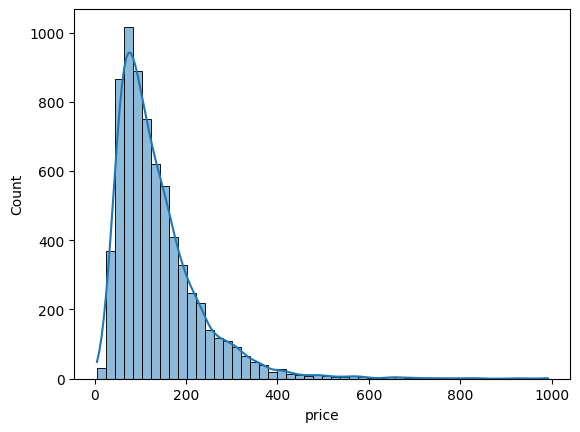

In [79]:
sns.histplot(df_filtered["price"], bins=50, kde=True)

<Axes: xlabel='price'>

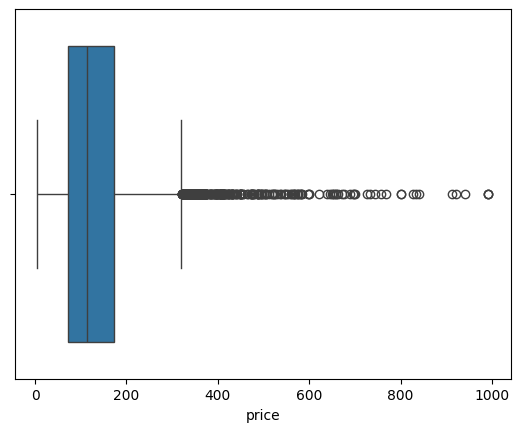

In [81]:
sns.boxplot(x=df_filtered["price"])

In [85]:
df_filtered["log_price"] = np.log1p(df_filtered["price"])

<Axes: xlabel='accommodates', ylabel='price'>

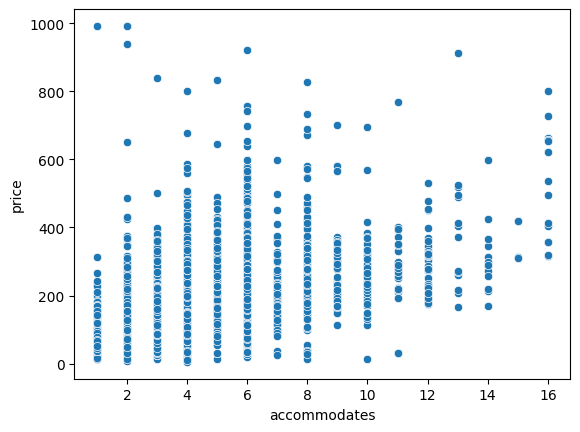

In [93]:
sns.scatterplot(data=df_filtered, x="accommodates", y="price")

<Axes: xlabel='bedrooms', ylabel='price'>

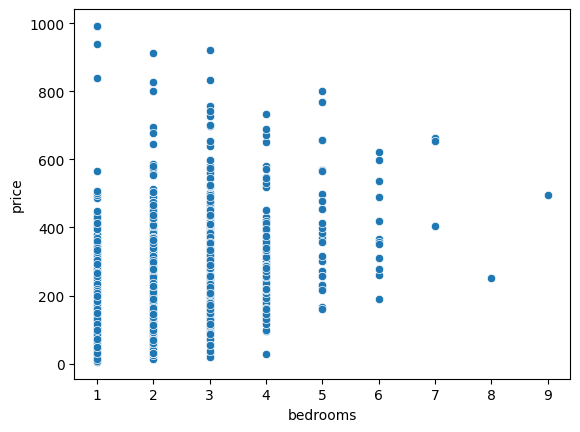

In [91]:
sns.scatterplot(data=df_filtered, x="bedrooms", y="price")

In [101]:
df_filtered

,price,accommodates,bedrooms,minimum_nights,availability_365,number_of_reviews,review_scores_rating,bathrooms,room_type_Hotel room,room_type_Private room,...,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Other,property_type_Private room in condo,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in rental unit,property_type_Room in hotel,distance_to_center,log_price
0,105.0,2,1.0,63,250,149,4.63,1.0,0,0,...,1,0,0,0,0,0,0,0,1.860321,4.663439
1,135.0,7,4.0,6,193,7,5.00,2.5,0,0,...,1,0,0,0,0,0,0,0,1.664484,4.912655
2,75.0,1,1.0,150,262,26,4.68,1.0,0,0,...,1,0,0,0,0,0,0,0,3.129226,4.330733
4,28.0,2,1.0,92,111,298,4.77,1.0,0,0,...,1,0,0,0,0,0,0,0,3.083494,3.367296
6,53.0,2,2.0,93,52,182,4.70,1.0,0,0,...,1,0,0,0,0,0,0,0,1.914578,3.988984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,200.0,4,1.0,1,348,2,5.00,1.0,0,0,...,1,0,0,0,0,0,0,0,5.370053,5.303305
14084,333.0,9,3.0,4,363,1,5.00,2.0,0,0,...,1,0,0,0,0,0,0,0,5.015208,5.811141
14085,145.0,4,2.0,2,315,4,5.00,1.0,0,0,...,0,0,1,0,0,0,0,0,5.311635,4.983607
14097,189.0,6,2.0,1,323,1,5.00,1.0,0,0,...,1,0,0,0,0,0,0,0,4.697496,5.247024


<Axes: xlabel='distance_to_center', ylabel='price'>

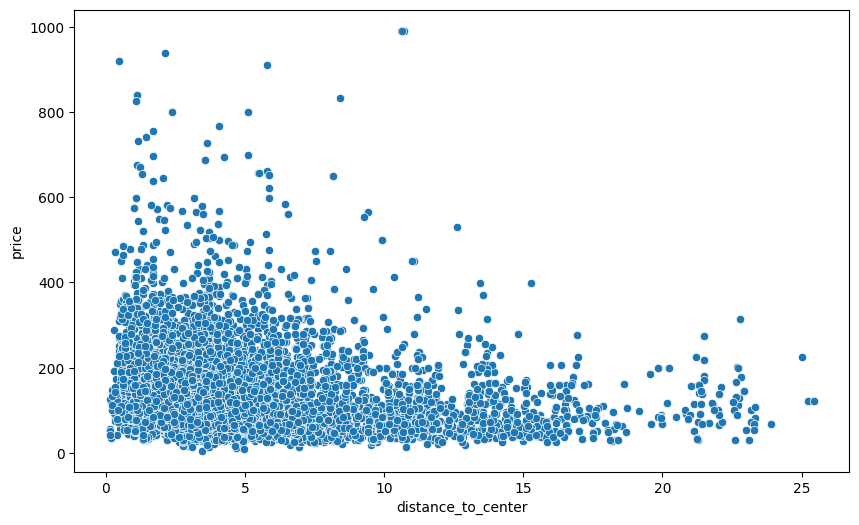

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="distance_to_center", y="price")